In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
import pycaret

In [3]:
pycaret.__version__

'2.2.0'

In [4]:
from pycaret.classification import *

In [5]:
from platform import python_version

print(python_version())

3.9.13


In [6]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [7]:
dataset.shape

(24000, 24)

In [38]:
data = pd.read_csv("water_dataset_clean2.csv")
data.head()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,...,Type of Water_Alkaline water,Type of Water_Bottled waters labeled as alkaline,Type of Water_Common bottled waters,Type of Water_Distilled reverse osmosis water,Type of Water_Ocean water,Type of Water_Tap water,Type of Hardness_Hard,Type of Hardness_Moderately hard,Type of Hardness_Slightly hard,Type of Hardness_Very Hard
0,0,7.1,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,...,0,0,1,0,0,0,0,0,0,1
1,1,3.7,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,...,0,0,0,0,0,0,1,0,0,0
2,2,8.1,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,...,0,1,0,0,0,0,0,0,0,1
3,3,8.3,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,...,0,1,0,0,0,0,0,0,0,1
4,4,9.1,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,...,1,0,0,0,0,0,0,0,0,1


In [68]:
data_unseen = data.copy()

In [39]:
data.drop(data.columns[[0]], axis=1, inplace=True)

In [40]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,...,Type of Water_Alkaline water,Type of Water_Bottled waters labeled as alkaline,Type of Water_Common bottled waters,Type of Water_Distilled reverse osmosis water,Type of Water_Ocean water,Type of Water_Tap water,Type of Hardness_Hard,Type of Hardness_Moderately hard,Type of Hardness_Slightly hard,Type of Hardness_Very Hard
0,7.1,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,...,0,0,1,0,0,0,0,0,0,1
1,3.7,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0,...,0,0,0,0,0,0,1,0,0,0
2,8.1,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0,...,0,1,0,0,0,0,0,0,0,1
3,8.3,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,...,0,1,0,0,0,0,0,0,0,1
4,9.1,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,...,1,0,0,0,0,0,0,0,0,1


In [41]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'Type of Water_Acidic water', 'Type of Water_Alkaline water',
       'Type of Water_Bottled waters labeled as alkaline',
       'Type of Water_Common bottled waters',
       'Type of Water_Distilled reverse osmosis water',
       'Type of Water_Ocean water', 'Type of Water_Tap water',
       'Type of Hardness_Hard', 'Type of Hardness_Moderately hard',
       'Type of Hardness_Slightly hard', 'Type of Hardness_Very Hard'],
      dtype='object')

In [42]:
data = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'Type of Water_Acidic water', 'Type of Water_Alkaline water',
       'Type of Water_Bottled waters labeled as alkaline',
       'Type of Water_Common bottled waters',
       'Type of Water_Distilled reverse osmosis water',
       'Type of Water_Ocean water', 'Type of Water_Tap water',
       'Type of Hardness_Hard', 'Type of Hardness_Moderately hard',
       'Type of Hardness_Slightly hard', 'Type of Hardness_Very Hard']]

In [45]:
k = setup(data = data, 
            target = "Potability",
            train_size = 0.8,
            fold = 5,
            session_id = 123,
            log_experiment = True, 
            experiment_name = 'grid_1', 
            silent = True,fold_shuffle=True,preprocess=False,
    imputation_type = 'iterative')

,Description,Value
0,session_id,123
1,Target,Potability
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3276, 21)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,11
8,Transformed Train Set,"(2620, 20)"
9,Transformed Test Set,"(656, 20)"


In [47]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7550,0.8237,0.7133,0.7573,0.7432,0.4525,0.4703,1.5680
gbc,Gradient Boosting Classifier,0.7416,0.8022,0.6917,0.7488,0.7241,0.4133,0.4411,0.1260
rf,Random Forest Classifier,0.7378,0.8015,0.6956,0.7371,0.7254,0.4145,0.4301,0.1220
ada,Ada Boost Classifier,0.7065,0.7517,0.6544,0.7057,0.6863,0.3330,0.3558,0.1780
dt,Decision Tree Classifier,0.6836,0.6671,0.6671,0.6842,0.6835,0.3340,0.3344,0.6660
et,Extra Trees Classifier,0.6580,0.6691,0.5937,0.6488,0.6237,0.2063,0.2317,0.1280
nb,Naive Bayes,0.6191,0.5809,0.5484,0.5940,0.5745,0.1076,0.1248,0.7680
lr,Logistic Regression,0.6126,0.5068,0.5007,0.4912,0.4665,0.0016,0.0139,1.8620
svm,SVM - Linear Kernel,0.6122,0.0000,0.5004,0.4137,0.4663,0.0009,0.0041,0.0160
ridge,Ridge Classifier,0.6076,0.0000,0.5000,0.5292,0.4765,0.0001,0.0017,0.0160


In [48]:
best_model = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7550,0.8237,0.7133,0.7573,0.7432,0.4525,0.4703,1.5080
rf,Random Forest Classifier,0.7378,0.8015,0.6956,0.7371,0.7254,0.4145,0.4301,0.1300
gbc,Gradient Boosting Classifier,0.7416,0.8022,0.6917,0.7488,0.7241,0.4133,0.4411,0.1260
dt,Decision Tree Classifier,0.6836,0.6671,0.6671,0.6842,0.6835,0.3340,0.3344,0.0200
ada,Ada Boost Classifier,0.7065,0.7517,0.6544,0.7057,0.6863,0.3330,0.3558,0.1940
et,Extra Trees Classifier,0.6580,0.6691,0.5937,0.6488,0.6237,0.2063,0.2317,0.1340
nb,Naive Bayes,0.6191,0.5809,0.5484,0.5940,0.5745,0.1076,0.1248,0.0160
knn,K Neighbors Classifier,0.5576,0.5163,0.5065,0.5323,0.5375,0.0138,0.0144,0.0680
lda,Linear Discriminant Analysis,0.6076,0.5218,0.5015,0.5344,0.4814,0.0036,0.0083,0.0140
lr,Logistic Regression,0.6126,0.5068,0.5007,0.4912,0.4665,0.0016,0.0139,0.0200


In [49]:
print(best_model)

In [50]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [51]:
ct = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7576,0.8309,0.7198,0.7575,0.7482,0.4626,0.4757
1,0.7309,0.7997,0.6835,0.7323,0.7152,0.3930,0.4139
2,0.7805,0.8410,0.7376,0.7890,0.7687,0.5068,0.5306
3,0.7462,0.8085,0.7059,0.7457,0.7353,0.4351,0.4494
4,0.7595,0.8385,0.7196,0.7620,0.7486,0.4648,0.4818
Mean,0.7550,0.8237,0.7133,0.7573,0.7432,0.4525,0.4703
SD,0.0164,0.0166,0.0180,0.0189,0.0176,0.0376,0.0385


In [52]:
print(ct)

In [53]:
tuned_ct = tune_model(ct)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7634,0.8351,0.7163,0.7725,0.7486,0.4646,0.4918
1,0.7309,0.8070,0.6772,0.7387,0.7103,0.3846,0.4157
2,0.7767,0.8357,0.7299,0.7892,0.7625,0.4943,0.5242
3,0.7557,0.7956,0.7101,0.7613,0.7417,0.4495,0.4727
4,0.7653,0.8404,0.7136,0.7842,0.7469,0.4640,0.5034
Mean,0.7584,0.8227,0.7094,0.7692,0.7420,0.4514,0.4816
SD,0.0153,0.0180,0.0175,0.0181,0.0173,0.0364,0.0369


In [54]:
print(tuned_ct)

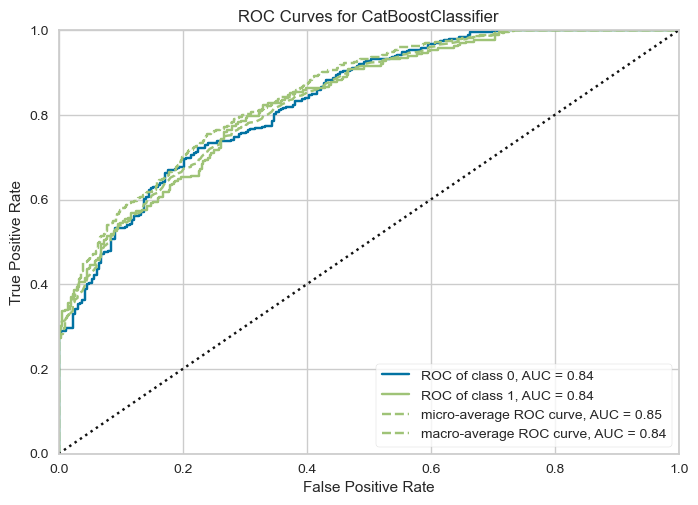

In [55]:
plot_model(tuned_ct,plot='auc')

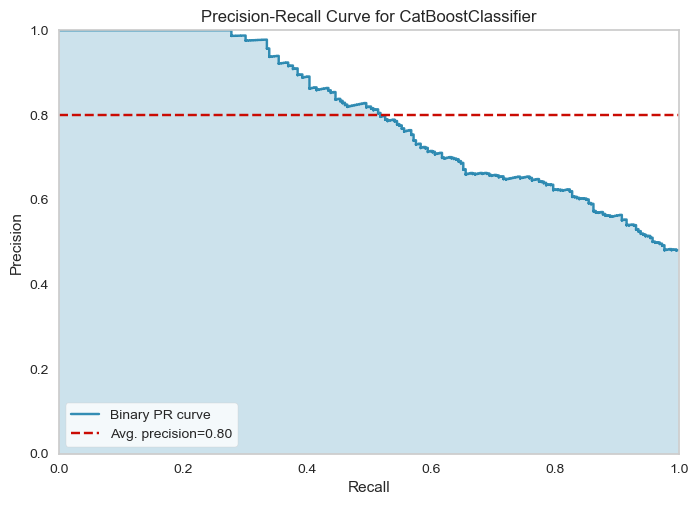

In [56]:
#precision-recall curve

plot_model(tuned_ct,plot='pr')

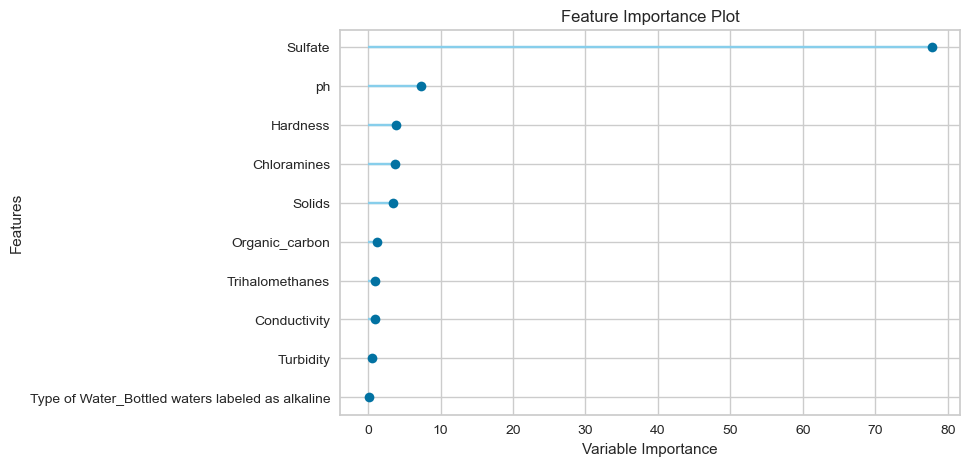

In [57]:
#feature importance plot

plot_model(tuned_ct,plot='feature')

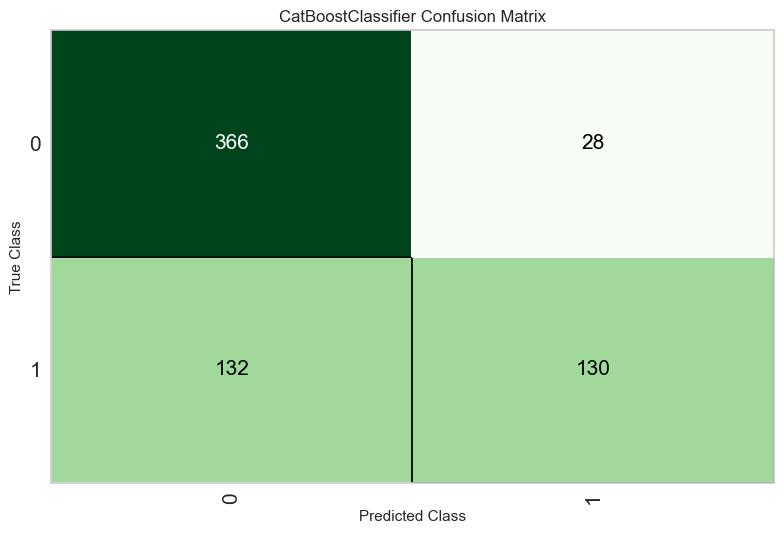

In [59]:
plot_model(tuned_ct,plot = 'confusion_matrix')

In [60]:
evaluate_model(tuned_ct)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [61]:
predict_model(tuned_ct)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7561,0.8353,0.7126,0.7700,0.7401,0.4554,0.4869


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Type of Water_Acidic water,...,Type of Water_Distilled reverse osmosis water,Type of Water_Ocean water,Type of Water_Tap water,Type of Hardness_Hard,Type of Hardness_Moderately hard,Type of Hardness_Slightly hard,Type of Hardness_Very Hard,Potability,Label,Score
0,7.5,212.816025,16679.673828,5.436264,366.601349,358.909576,6.134211,46.655430,4.991675,0,...,0,0,1,0,0,0,1,1,0,0.6112
1,7.1,178.154861,34383.597656,6.425770,311.526886,570.378784,17.592127,68.992737,4.005893,0,...,0,0,0,1,0,0,0,1,1,0.5161
2,6.1,230.717697,44868.457031,6.443392,334.564301,397.236786,14.037903,76.701607,3.292249,0,...,1,0,0,0,0,0,1,0,0,0.9538
3,6.4,225.613098,15596.473633,6.153472,332.566986,466.044403,18.015385,87.163628,4.184783,0,...,1,0,0,0,0,0,1,1,1,0.9565
4,6.9,198.476440,16904.201172,6.341407,299.521667,470.599762,15.045816,61.146088,4.241135,0,...,0,0,0,0,0,0,1,1,0,0.6290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,10.1,240.432098,15331.302734,5.392651,361.902924,403.041809,16.131124,61.111145,3.425763,0,...,0,0,0,0,0,0,1,0,0,0.7701
652,7.5,203.200287,15825.182617,6.754242,334.564301,348.952911,11.094898,91.493088,3.930081,0,...,0,0,1,0,0,0,1,0,0,0.9514
653,7.4,167.328461,31935.691406,7.896365,334.564301,398.574219,14.824433,69.252785,4.497629,0,...,0,0,0,1,0,0,0,0,0,0.9366
654,6.2,206.040588,22805.611328,4.398831,332.566986,409.357666,16.895725,61.725876,4.169661,0,...,1,0,0,0,0,0,1,1,1,0.9492


In [62]:
#finalize model

final_ct = finalize_model(tuned_ct)

In [63]:
print(final_ct)

In [64]:
save_model(final_ct,"Final cat boost model 13 Jan 2022")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Potability', time_features=[])),
                 ['trained_model',
          verbose=False),
 'Final cat boost model 13 Jan 2022.pkl')

In [65]:
#loading the saved model

saved_final_ct = load_model("Final cat boost model 13 Jan 2022")

Transformation Pipeline and Model Successfully Loaded


In [69]:
new_prediction = predict_model(saved_final_ct,data=data_unseen)

In [70]:
new_prediction.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,...,Type of Water_Common bottled waters,Type of Water_Distilled reverse osmosis water,Type of Water_Ocean water,Type of Water_Tap water,Type of Hardness_Hard,Type of Hardness_Moderately hard,Type of Hardness_Slightly hard,Type of Hardness_Very Hard,Label,Score
0,7.1,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,...,1,0,0,0,0,0,0,1,0,0.6335
1,3.7,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0,...,0,0,0,0,1,0,0,0,0,0.9634
2,8.1,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0,...,0,0,0,0,0,0,0,1,0,0.9284
3,8.3,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,...,0,0,0,0,0,0,0,1,0,0.7021
4,9.1,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,...,0,0,0,0,0,0,0,1,0,0.6782


In [73]:
from pycaret.utils import check_metric
check_metric(new_prediction['Potability'],new_prediction['Label'],metric='Accuracy')

0.8172